In [1]:
import pandas as pd
churn_data = pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


# Задание 1.
### Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

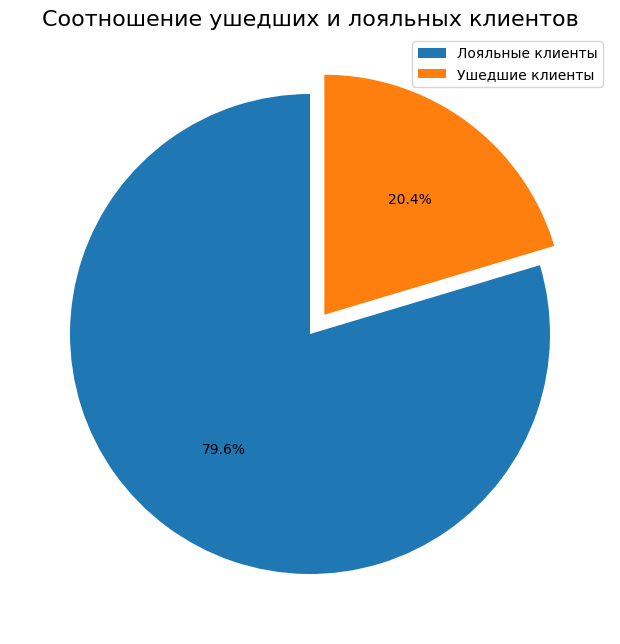

In [3]:
import matplotlib.pyplot as plt # импортируем библиотеку, необходимую для выполнения задания

fig = plt.figure(figsize=(12, 6)) # создаем figure
ax = fig.add_axes((1, 1, 1, 1)) # задаем оси
exited_clients = churn_data['Exited'].value_counts().sort_values(ascending=False) # преобразуем необходимые данные

pie = ax.pie(
    exited_clients,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1)
) # задаем параметры для создания круговой диаграммы
title = ax.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16) # создаем заголовок и задаем для него параметры
plt.legend(labels={'Лояльные клиенты':0, 'Ушедшие клиенты':1}) # создаем легенду
plt.show(pie) # демонстрация

## Выводы по заданию 1:
### на изображенной выше круговой диаграмме отчетливо видно, что ушедшие клиенты составляют 1/5 от всех клиентов банка, что является достаточно высоким показателем для крупной организации, если брать во внимание, что банк международный.

# Задание 2
### Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

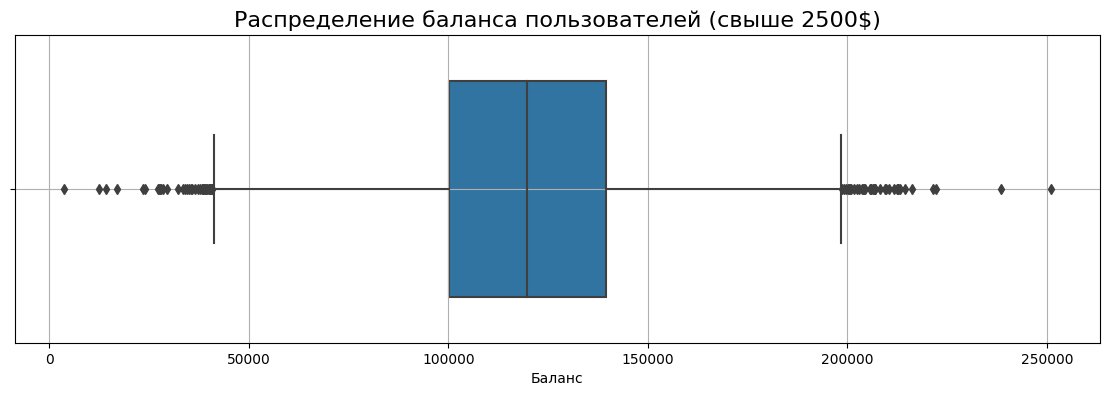

In [4]:
import seaborn as sns # импортируем библиотеку, необходимую для выполнения задания

mask = churn_data[(churn_data['Balance'] > 2500)] # задаем маску с параметром "Баланс больше 2500$"
fig = plt.figure(figsize=(14, 4)) # создаем figure
boxplot = sns.boxplot(
    data=mask,
    x='Balance',
    orient='h',
    width=0.7
) # задаем параметры для построения коробчатой диаграммы
boxplot.set_title('Распределение баланса пользователей (свыше 2500$)', fontsize=16) # создаем заголовок и задаем для него параметры
boxplot.set_xlabel('Баланс') # задаем имя оси абцисс
boxplot.grid() # отображаем сетку

## Выводы по заданию 2:
### На коробчатой диаграмме, расположенной выше мы видим, что 25% квантиль находится на значении 100000$, медиана примерно на 120000$, а 75% квантиль около 140000$. Потенциальные выбросы, которых на графике много, в основном, сосредоточены около границ распеределения. Также, по заданной нами маске, всего один человек имеет баланс по нижней границе маски, 3 человека с балансом лицевого счета до 20000$ и один клиент держит в банке свыше 250000$. 
### Таким образом, мы понимаем, что лояльные клиенты банка, в основном, состоятельные люди, о чем нам говорит медиана данного графика и высокое средоточение потенциальных выбросов не только по нижним границам распределения, но и верхним.

# Задание 3
### Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Text(0, 0.5, 'Статус клиента')

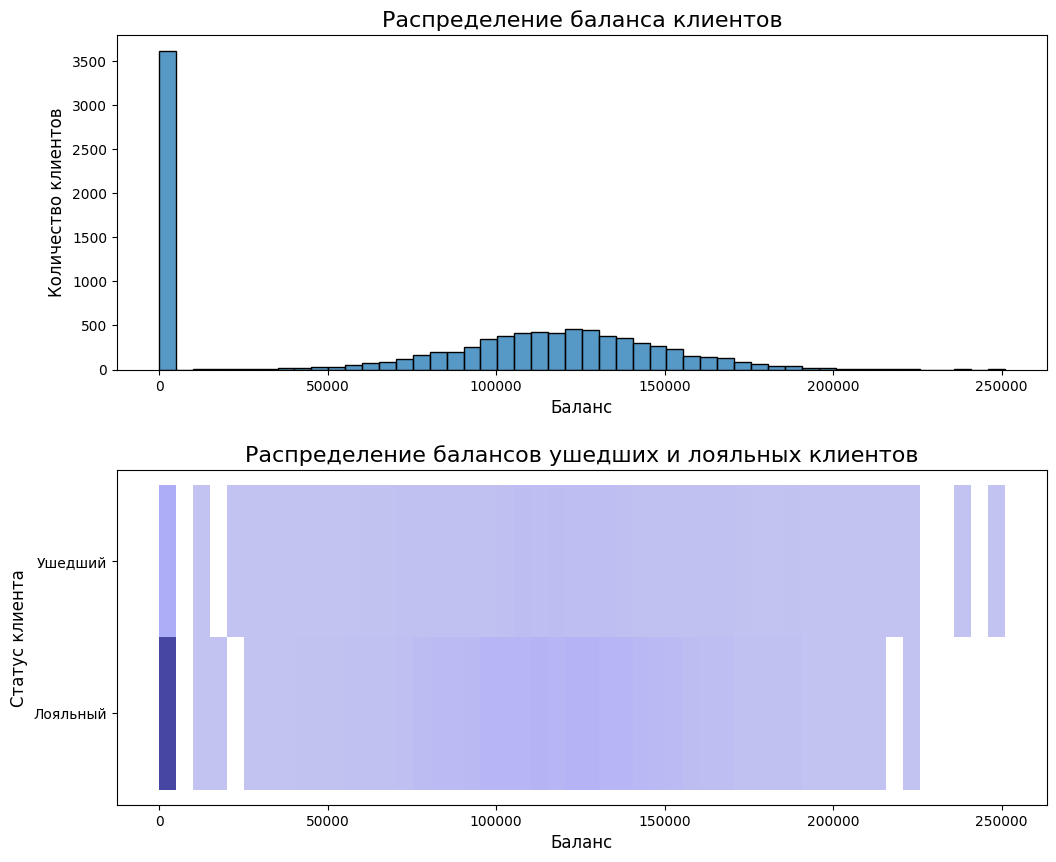

In [5]:
churn_data = churn_data.replace({'Exited':{0:'Лояльный', 1:'Ушедший'}}) # заменяем значения в Exited 
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10)) # создаем 2 макета под графики
plt.subplots_adjust(hspace=.3) # чтобы графики не сливались, опускаем чуть ниже второй
histplot1 = sns.histplot(
    data=churn_data, 
    x='Balance', 
    bins=50,
    ax=axes[0],
) # задаем параметры для первого графика
histplot1.set_title('Распределение баланса клиентов', fontsize=16) # создаем заголовок и задаем для него параметры
histplot1.set_xlabel('Баланс', fontsize=12) # задаем имя оси абцисс и задаем параметры
histplot1.set_ylabel('Количество клиентов', fontsize=12) # задаем имя оси ординат и задаем параметры

histplot2 = sns.histplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    bins=50,
    color='blue',
    ax=axes[1]
) # задаем параметры для второго графика
histplot2.set_title('Распределение балансов ушедших и лояльных клиентов', fontsize=16) # создаем заголовок и задаем для него параметры
histplot2.set_xlabel('Баланс', fontsize=12) # задаем имя оси абцисс и задаем параметры
histplot2.set_ylabel('Статус клиента', fontsize=12) # задаем имя оси ординат и задаем параметры



## Выводы по заданию 3:
### На первом графике мы видим, что более 3500 клиентов хранят на своих счетах от 0 до 5000$, на втором, глядя на те же значения баланса можно сделать вывод, что лояльные клиенты в большей степени держат на балансе сумму в данном диапазоне. По интенсивности цвета клиентов второго графика также можно сказать, что определенной закономерности закрытия счета, исходя из суммы на балансе нет. Большее количество лояльных клиентов держат на счете от 75000$ до 175000$, в сравнение с ушедшими. Клиент с максимальной суммой на балансе (более 250000$) оказался бывшим клиентом банка, как и второй клиент по сумме средств на счете.
###  Можно предположить, что причинами для закрытия счета могут быть:
### 1. Так как банк международный, возможно, клиенту больше нет необходимости производить транзакции за рубеж.
### 2. Отсутствие персонального менеджера для ВИП-клиентов.
### 3. Высокая комиссия за транзакции.
### 4. Низкий процент по вкладам и накопительным счетам.

# Задание 4
### Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

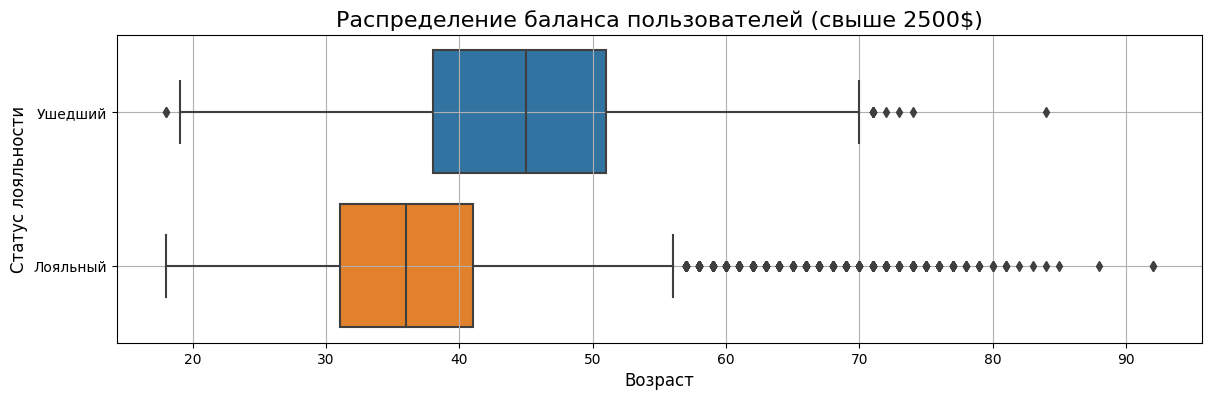

In [6]:
fig = plt.figure(figsize=(14, 4)) # создаем figure
boxplot = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h',
    width=0.8
) # задаем параметры для построения коробчатой диаграммы
boxplot.set_title('Распределение баланса пользователей (свыше 2500$)', fontsize=16) # создаем заголовок и задаем параметры для него
boxplot.set_xlabel('Возраст', fontsize=12) # задаем имя оси абцисс и параметры
boxplot.set_ylabel('Статус лояльности', fontsize=12) # задаем имя оси ординат и параметры
boxplot.grid() # отображаем сетку


## Выводы по заданию 4:
### Возрастные категории клиентов банка в разрезе признака оттока кардинально отличаются друг от друга. Так как вораст лояльных клиентов судя по коробке находится в основном в диапазоне от 31 до 41 года, в то время как ушедшие клиенты от 37 до 51 года. Количество потенциальных выбросов преобладает у лояльных клиентов, причем только за верхними границами распределения. Так как мы видим, что ушедшие клиенты старше лояльных клиентов, это значит, что банку стоит обратить внимание на возрастную категорию 45+ и провести кампанию с целью удержания данных клиентов. Ведь большое количество потенциальных выбросов лояльных клиентов как раз попадают в данную категорию граждан и у банка при игнорировании данного совета есть все шансы перевести этих клиентов из статуса "Лояльный" в "Ушедший. Как вариант, это может быть связано с использованием мобильного приложения, отсутствием офисов, куда человек может лично прийти. Старшее поколение в большинстве своем "не дружит" с технологиями. Соответственно, банку необходимо продумать план работы с данной категорией клиентов.

# Задание 5
### Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Text(0, 0.5, 'Кредитный рейтинг')

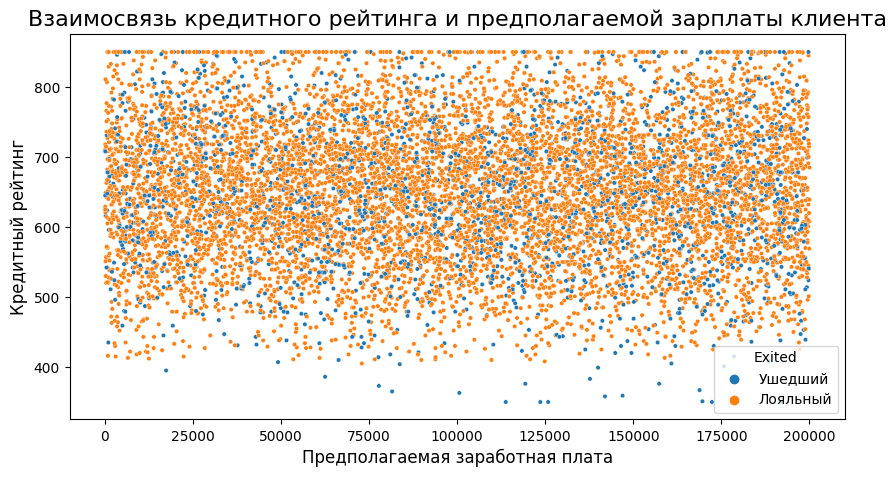

In [7]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
    s=10,
) # задаем параметры для построения диаграммы рассения
scatterplot.set_title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты клиента', fontsize=16) # создаем заголовок и задаем для него параметры
scatterplot.set_xlabel('Предполагаемая заработная плата', fontsize=12) # задаем имя оси абцисс и параметры
scatterplot.set_ylabel('Кредитный рейтинг', fontsize=12) # задаем имя оси ординат и параметры

## Выводы по заданию 5:
### Взаимосвязи между кредитным рейтингом и предполагаемой заработной платой нет. Так как точки распределены равномерно по графику. Также можно увидеть, что ушедшие клиенты с кредитным рейтингом ниже 400 имеют предполагаемую заработную плату выше 60000$. А клиенты с максимальным кредитным рейтингом, в основном, являются лояльными клиентами банка.

# Задание 6:
### Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

<Axes: title={'center': 'График ушедших клиентов по половому признаку'}, xlabel='Пол клиента'>

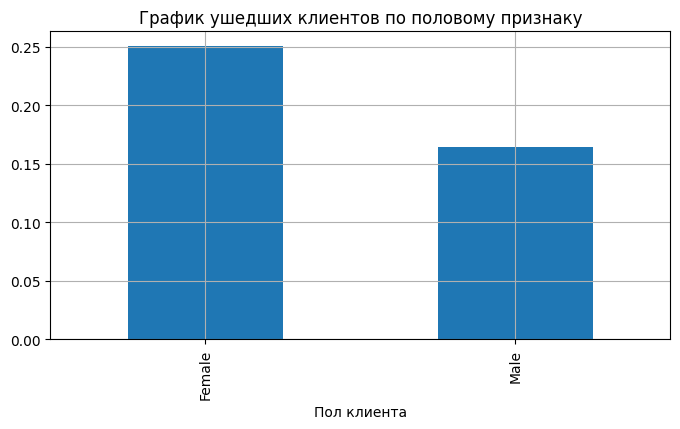

In [8]:
churn_data = pd.read_csv('churn.csv')
exited_mean = churn_data.groupby(['Gender'])['Exited'].mean() # группируем данные по полу и рассчитываем среднее значение ухода из банка
exited_mean.plot(
    kind='bar',
    grid=True, 
    figsize=(8, 4),
    title='График ушедших клиентов по половому признаку',
    xlabel='Пол клиента'
) # создаем график и задаем для него параметры


## Выводы по заданию 6:
### на графике, изображенном выше мы видим, что большая часть ушедших клиентов - женщины.

# Задание 7
### Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [9]:
import plotly_express as px # импортируем библиотеку, необходимую для выполнения задания

churn_data['Loyal'] = 1 - churn_data['Exited'] # создаем новый признак 'Loyal'
grouped_exited = churn_data.groupby('NumOfProducts')[['Exited', 'Loyal']].sum() # производим группировку исходной таблицы по статусу лояльности и количеству приобретенных услуг
fig = px.bar(
    data_frame=grouped_exited, 
    x=grouped_exited.index,
    y=['Loyal', 'Exited'],
    text='value',
    height=600, 
    width=800,
    title='Взаимосвязь оттока клиентов с числом приобретённых услуг',
    labels={'variable': 'Статус лояльности','value':'Количество клиентов', 'NumOfProducts': 'Количество продуктов'}
) # создаем график и задаем для него параметры
# fig.update_layout(barmode = 'group') # в лекциях не нашел существенного отличия между двумя типами диаграмм,\
    # поэтому если полученная диаграмма не подходит, то огромная просьба распаковать эту строку)
fig.show() # демонстрация

## Выводы по заданию 7:
### Из графика мы видим, что чем меньше услуг банка приобрел клиент, тем больше вероятность того, что он уйдет. Так 1409 бывших клиентов банка приобрели всего 1 услугу и ушли из банка. И всего 60 человек, приобревших 4 услуги банка перестали им пользоваться. Соответственно, банку необходимо развить стратегию по предложению человеку воспользоваться 2 услугами. Потому что клиенты, которые приобрели 2 услуги в большем количестве остались лояльными. А те, кто приобрел 3 услуги - в основном, перестали быть клиентами банка.

# Задание 8
### Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [10]:
churn_data['Loyal'] = 1 - churn_data['Exited'] # создаем новый признак 'Loyal'
churn_data = churn_data.replace({'IsActiveMember':{0:'Нет', 1:'Есть'}}) # заменяем значения в IsActiveMember 
grouped_exited = churn_data.groupby('IsActiveMember')['Exited', 'Loyal'].sum() # производим группировку исходной таблицы по статусу клиента и количеству приобретенных услуг
fig = px.bar(
    data_frame=grouped_exited, 
    x=grouped_exited.index,
    y=['Loyal', 'Exited'],
    text='value',
    height=600, #высота
    width=800, #ширина
    title='Взаимосвязь оттока клиентов от числа приобретённых услуг',
    labels={'variable': 'Статус лояльности','value':'Количество клиентов', 'IsActiveMember': 'Статус активного клиента банка'}
) # создаем график и задаем для него параметры
fig.update_layout(barmode = 'group') # в лекциях не нашел существенного отличия между двумя типами диаграмм,\
    # поэтому если полученная диаграмма не подходит, то огромная просьба распаковать эту строку)
fig.show() # демонстрация

C:\Users\Матвей\AppData\Local\Temp\ipykernel_2808\3065932154.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



## Выводы по заданию 8:
### По графику можно сказать, что почти в 2 раза клиенты уходят из банка реже при наличии статуса активного клиента. Банку необходимо связываться напрямую с клиентами для возобновления статуса активного клиента. Если не получится уговорить, необходимо тогда собрать данные посредством быстрого анкетирования по телефону и выявить истинные причины нежелания сотрудничать с банком. Также можно разработать систему поощерения активных клиентов банка, например, кэшбек от партнеров, начисление процентов на остаток по счету, промокоды на бесплатные пробные периоды у партнеров (онлайн кинотеатры, антивирусы и прочее). Чем больше клиенту предложений за которые ему нет необходимости платить, тем выше вероятность далнейшегго сотрудничества.

# Задание 9
###  В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [11]:
choropleth_data = churn_data.groupby('Geography')['Exited'].mean() # группируем данные по странам и рассчитываем долю ушедших клинтов
#строим график
fig = px.choropleth(
    data_frame=choropleth_data, # DataFrame
    locations=choropleth_data.index, # столбец с локациями
    locationmode = "country names", # режим сопоставления локаций с базой Plotly
    color="Exited", # от чего зависит цвет
    range_color=[0, 0.4], # диапазон цвета
    title='Доля ушедших клиентов по странам', # заголовок
    width=1000, # ширина
    height=550, # высота
    color_continuous_scale='Reds' # палитра цветов
)
fig.show() # демонстрация

## Выводы по заданию 9:
### В основном, клиенты ушедшие из банка, проживают в Европе. Самой нелояльной страной является Германия. Возможно, поддержка клиентов операторами и менеджерами банка осуществляется на английском языке, а эти люди не знают этот язык, что и стало причиной ухода из банка.

# Задание 10
### Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. 

### Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

### На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(95.72222222222221, 0.5, 'Категория кредитного рейтинга')

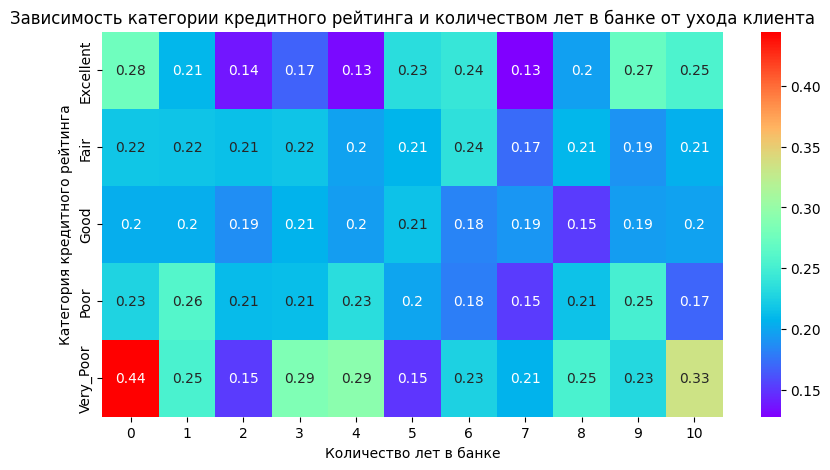

In [14]:
# функция для создания нового признака
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat) # создаем новый признак, применяя к нему функцию
churn_table = churn_data.pivot_table(
    columns='Tenure',
    index='CreditScoreCat',
    values='Exited',
    aggfunc='mean'
) # создаем сводную таблицу

fig = plt.figure(figsize=(10,5)) # создаем figure
heatmap = sns.heatmap(data=churn_table, cmap='rainbow', annot=True) # создаем тепловую карту с аннотацией
heatmap.set_title('Зависимость категории кредитного рейтинга и количеством лет в банке от ухода клиента') # создаем заголовок 
heatmap.set_xlabel('Количество лет в банке') # задаем имя оси абцисс
heatmap.set_ylabel('Категория кредитного рейтинга') # задаем имя оси ординат

## Выводы по заданию 10:
### Больше всего уходят очень бедные клиенты, которые пользовались услугами менее года (их среднее значение равняется 0.44), на втором месте также очень бедные, но уже которые пользуются услугами банка 10 лет (среднее значение ухода 0.33). И на третьем месте расположились очень бедные, пользующиеся услугами банка 3-4 года (среднее значение - 0.29). Меньше всего покидают банк клиенты с категорией кредитного рейтинга Excellent с количетсвом лет в банке в 4 года и в 7 лет (среднее значение - 0.13)